In [125]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
#import numpy as np
#import pandas as pd
#import datetime
#import seaborn as sns
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_csv('./Resources/Cleaned_Datasets/daily_trip.csv')
df

,startdate,Trip_number,membertype
0,2010-09-20,212,212
1,2010-09-21,324,324
2,2010-09-22,377,377
3,2010-09-23,373,373
4,2010-09-24,362,362
...,...,...,...
3871,2021-04-26,5328,5328
3872,2021-04-27,6770,6770
3873,2021-04-28,6164,6164
3874,2021-04-29,5557,5557


In [55]:
daily_trip=df.drop(['membertype'], axis=1)

In [56]:
#change start date to date type data
daily_trip['startdate'] = pd.to_datetime(daily_trip['startdate'])

In [57]:
daily_trip.describe()

,Trip_number
count,3876.000000
mean,7326.094943
std,3888.626023
min,0.000000
25%,4261.000000
50%,7029.000000
75%,10595.500000
max,19113.000000


In [58]:
daily_trip.dropna()

,startdate,Trip_number
0,2010-09-20,212
1,2010-09-21,324
2,2010-09-22,377
3,2010-09-23,373
4,2010-09-24,362
...,...,...
3871,2021-04-26,5328
3872,2021-04-27,6770
3873,2021-04-28,6164
3874,2021-04-29,5557


In [60]:
trip_date =daily_trip.rename(columns = {'startdate': 'date','Trip_number': 'trip'})
trip_date

,date,trip
0,2010-09-20,212
1,2010-09-21,324
2,2010-09-22,377
3,2010-09-23,373
4,2010-09-24,362
...,...,...
3871,2021-04-26,5328
3872,2021-04-27,6770
3873,2021-04-28,6164
3874,2021-04-29,5557


In [61]:
#set date as index
trip_date.set_index('date', inplace=True) 
trip_date.head()

,trip
date,
2010-09-20,212
2010-09-21,324
2010-09-22,377
2010-09-23,373
2010-09-24,362


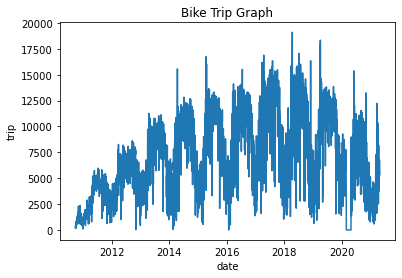

In [62]:
#Visualizing timeseries
plt.xlabel("date")
plt.ylabel("trip")
plt.title("Bike Trip Graph")
plt.plot(trip_date)

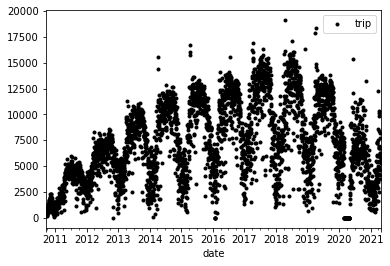

In [63]:
trip_date.plot(style='k.')
plt.show()

<AxesSubplot:ylabel='Density'>

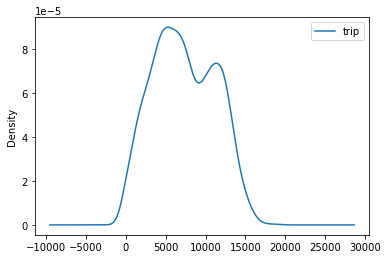

In [64]:
#We can also visualize the data in our series through a distribution too.
trip_date.plot(kind='kde')

In [113]:
DF=trip_date.dropna()

In [115]:
DF = DF.rename(columns = {'date': 'dt', 'trip': 'tp'})

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [117]:
decomposition = seasonal_decompose(DF['tp'], period = 48, extrapolate_trend = 4)

In [118]:
Decom_Df = DF
Decom_Df.loc[:, "trend"] = decomposition.trend
Decom_Df.loc[:, "seasonal"] = decomposition.seasonal
Decom_Df.loc[:, "residual"] = decomposition.resid

In [89]:
def plot_decomposition(Decom_Df,tp,trend,seasonal, residual):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[tp], label = 'Original', c = 'b')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend', c = 'lime')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality', c = 'm')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals', c = 'r')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  plt.subtitle('Signal Decomposition of  %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
  plt.show()
 

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

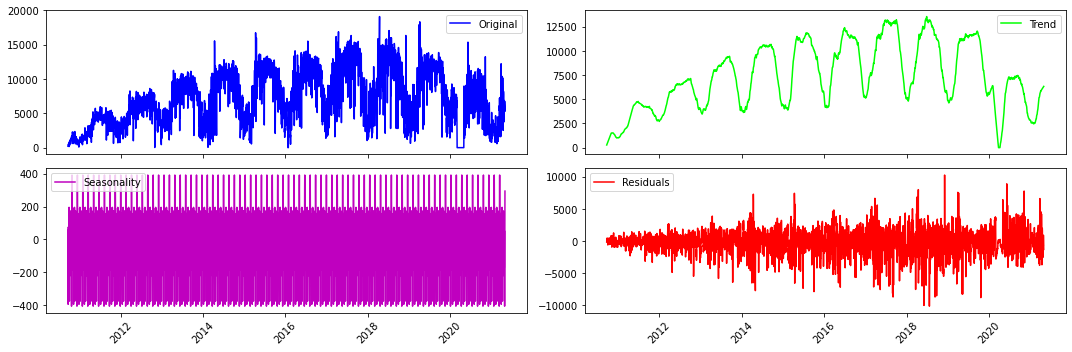

In [90]:
 plot_decomposition(df, tp = 'tp', trend = 'trend', seasonal = 'seasonal', residual = 'residual')

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
def test_stationarity(df, tp):

  rollmean = df[tp].rolling(window=12, center =False).mean()
  rolstd   = df[tp].rolling(window=12, center = False).std()

  original = plt.plot(df[tp], color='blue', label ='original')
  mean = plt.plot(rollmean, 
                  color = 'red', 
                  label = 'Rolling Mean')
  std = plt.plot(rolstd, 
                  color = 'black', 
                  label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation for %s' %(tp))
  plt.xticks(rotation = 45)
  plt.show(block = False)
  plt.close()
    # Perform Dickey-Fuller test: Want p-value below 5%
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(df[tp], 
                    autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], 
                        index = ['Test Statistic',
                                'p-value',
                                '# Lags Used',
                                'Number of Observations Used'])
  for key, value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)

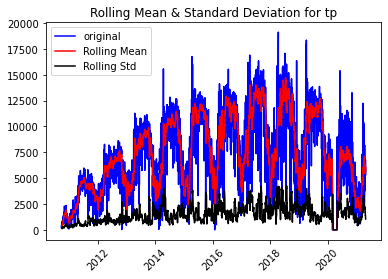

Results of Dickey-Fuller Test:
Test Statistic                   -3.365707
p-value                           0.012185
# Lags Used                      29.000000
Number of Observations Used    3846.000000
Critical Value (1%)              -3.432051
Critical Value (5%)              -2.862292
Critical Value (10%)             -2.567170
dtype: float64


In [93]:
test_stationarity(df = DF, tp = 'tp')

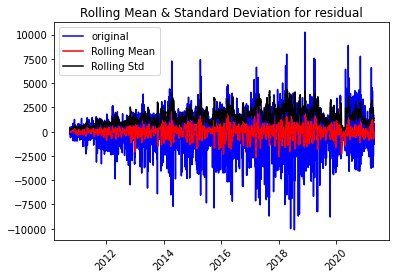

Results of Dickey-Fuller Test:
Test Statistic                -1.572535e+01
p-value                        1.308832e-28
# Lags Used                    2.900000e+01
Number of Observations Used    3.846000e+03
Critical Value (1%)           -3.432051e+00
Critical Value (5%)           -2.862292e+00
Critical Value (10%)          -2.567170e+00
dtype: float64


In [94]:
test_stationarity(df = Decom_Df, tp = 'residual')

In [87]:
from statsmodels.tsa.arima_model import ARIMA

In [99]:
def run_arima(df, tp, p, d, q):
  model = ARIMA(df[tp], order = (p, d, q))
  results_arima = model.fit(disp = 1)

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[tp][-len_results:]

  rss = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/len(df[tp]))

  print("RMSE: ", rmse)

  plt.figure()
  plt.plot(df[tp])
  plt.plot(results_arima.fittedvalues, color = 'r')
  plt.show()

  return results_arima

In [100]:
Sta_Data_DF = Decom_Df.fillna(0)

C:\Users\Tikuyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RMSE:  1673.7647366030578


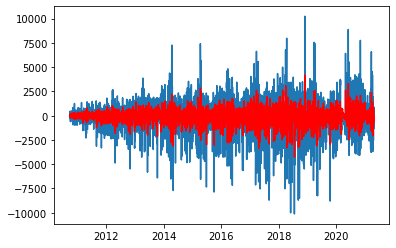

In [103]:
model_Ar = run_arima(Sta_Data_DF, tp = 'residual', p = 20, d = 0, q = 0)

In [104]:
model_Ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               residual   No. Observations:                 3876
Model:                    ARMA(20, 0)   Log Likelihood              -34271.037
Method:                       css-mle   S.D. of innovations           1673.762
Date:                Thu, 22 Jul 2021   AIC                          68586.075
Time:                        18:36:08   BIC                          68723.851
Sample:                    09-20-2010   HQIC                         68634.991
                         - 04-30-2021                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3632     25.278      0.014      0.989     -49.181      49.908
ar.L1.residual      0.3466      0.016     21.582      0.000       0.315       0.378
ar.L2.residual     -0.0380      0.017     -2.235      0.025      -0.071      -0.005
ar.L3.residual     -0.0136      0.017     -0.798      0.425      -0.047       0.020
ar.L4.residual     -0.0018      0.017     -0.106      0.915      -0.035       0.031
ar.L5.residual     -0.0453      0.017     -2.668      0.008      -0.078      -0.012
ar.L6.residual      0.0161      0.017      0.948      0.343      -0.017       0.049
ar.L7.residual      0.0663      0.017      3.923      0.000       0.033       0.099
ar.L8.residual     -0.0329      0.017     -1.943      0.052      -0.066       0.000
ar.L9.residual     -0.0825      0.017     -4.873      0.000      -0.116      -0.049
ar.L10.residual    -0.0344      0.017     -2.030      0.042      -0.068      -0.001
ar.L11.residual    -0.0465      0.017     -2.738      0.006      -0.080      -0.013
ar.L12.residual    -0.0312      0.017     -1.843      0.065      -0.064       0.002
ar.L13.residual    -0.0179      0.017     -1.056      0.291      -0.051       0.015
ar.L14.residual     0.0716      0.017      4.237      0.000       0.038       0.105
ar.L15.residual    -0.0662      0.017     -3.905      0.000      -0.099      -0.033
ar.L16.residual    -0.0276      0.017     -1.626      0.104      -0.061       0.006
ar.L17.residual    -0.0282      0.017     -1.659      0.097      -0.061       0.005
ar.L18.residual    -0.0453      0.017     -2.671      0.008      -0.079      -0.012
ar.L19.residual    -0.0408      0.017     -2.402      0.016      -0.074      -0.008
ar.L20.residual    -0.0133      0.016     -0.830      0.407      -0.045       0.018
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0510           -0.2160j            1.0730           -0.0323
AR.2             1.0510           +0.2160j            1.0730            0.0323
AR.3             0.9849           -0.5318j            1.1193           -0.0788
AR.4             0.9849           +0.5318j            1.1193            0.0788
AR.5             0.6978           -0.8376j            1.0902           -0.1395
AR.6             0.6978           +0.8376j            1.0902            0.1395
AR.7             0.5041           -1.1448j            1.2508           -0.1840
AR.8             0.5041           +1.1448j            1.2508            0.1840
AR.9             0.1552           -1.1961j            1.2061           -0.2295
AR.10            0.1552           +1.1961j            1.2061            0.2295
AR.11           -0.2578           -1.0923j            1.1223           -0.2869
AR.12           -0.2578           +1.092

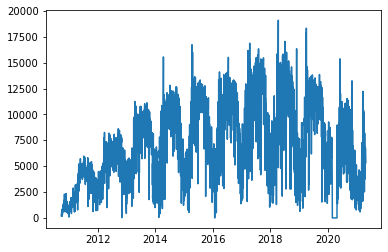

In [105]:
plt.figure()
plt.plot(DF.tp)

In [106]:
def log_trans(df, tp):
  return df[tp].apply(lambda x:np.log(x))

In [119]:
DF['tp_log'] = log_trans(DF, 'tp')
DF.head()

,tp,trend,seasonal,residual,tp_log
date,,,,,
2010-09-20,212,273.975000,71.731488,-133.706488,5.356586
2010-09-21,324,305.094792,39.354495,-20.449287,5.780744
2010-09-22,377,336.214583,-396.132452,436.917869,5.932245
2010-09-23,373,367.334375,56.413008,-50.747383,5.921578
2010-09-24,362,398.454167,55.364590,-91.818757,5.891644


In [121]:
DF=DF.dropna()

In [124]:
#Decomposition = seasonal_decompose(DF['tp_log'], period = 48, extrapolate_trend = 100)